#第二章 感知机

参考内容：
[机器学习——15分钟透彻理解感知机](https://blog.csdn.net/yxhlfx/article/details/79093456)

最终目标：
实现鸢尾花的分类

## step 1 感知机的原始形式

实现目标：即书中的例2.1

感知机模型：$f(x) = sign(w\cdot x+b)$

随机梯度下降：

随机选取一个超平面，用梯度下降法不断最小化目标函数，在这个过程中随机选取一个误差分类点使其梯度下降。

$w \leftarrow w +\eta x_i y_i$

$b \leftarrow b + \eta y_i$ 


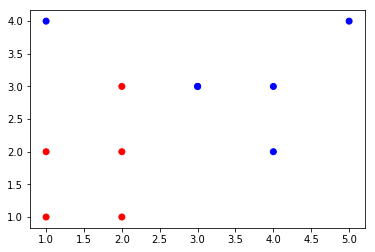

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

datas =np.array([[1,2,-1],[2,1,-1],[2,2,-1],[1,4,1],
                 [3,3,1],[5,4,1],[3, 3, 1], [4, 3, 1],
                 [1, 1, -1],[2, 3, -1], [4, 2, 1]])
colors = np.array(['r','g','b','y'])

plt.scatter(datas[:,0],datas[:,1],c=colors[datas[:,2]+1])
plt.show()

In [2]:
class OriginalPerceptron:
    def __init__(self,dataset,lr=1,shuffle=True):
        self.dataset = dataset
        self.learningrate = lr
        self.w = np.random.uniform(0,1,[len(self.dataset[0])-1,1])
        self.b = 0
        self.shuffle = shuffle
        
    def sign(self,x):
        return np.dot(x,self.w) +self.b 
    
    def fitting(self):
        for i in range(10000):
            flag = 0
            for data in self.dataset:
                x = data[0:-1]
                y = data[-1]
                if y * self.sign(x) < 0:
                    self.w = np.add(self.w,np.reshape(self.learningrate * y * x,(-1,1)))
                    self.b = np.add(self.b,np.reshape(self.learningrate * y,(-1,1)))
                    flag = 1
                    break
            if flag == 0:
                print("通过迭代{0}次后，完成分割".format(i+1))
                break
            else:
                if self.shuffle == True:
                    np.random.shuffle(self.dataset)
    
    def getfunc(self):
        return self.w,self.b
    
    def loss(self,x,y):
        predict = self.sign(x)
        predict = np.where(predict == y, 0, -1)
        w = np.sum(np.square(self.w)) # w的L2范数
        return np.sum(predict * y * self.sign(x))/w


通过迭代151次后，完成分割
w [[3.48995441]
 [5.45239423]] 
 b [[-24]]


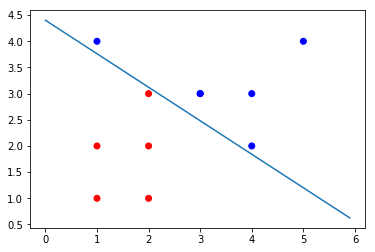

In [3]:
percepton = OriginalPerceptron(datas)
percepton.fitting()
w,b = percepton.getfunc()
print("w",w,"\n b",b)
x = np.arange(0, 6, 0.1)
y = -(w[0][0] * x + b[0])/w[1][0]

plt.plot(x,y)
plt.scatter(datas[:,0],datas[:,1],c=colors[datas[:,2]+1])
plt.show()

通过迭代1次后，完成分割
w [[3.48995441]
 [5.45239423]] 
 b [[-24]]


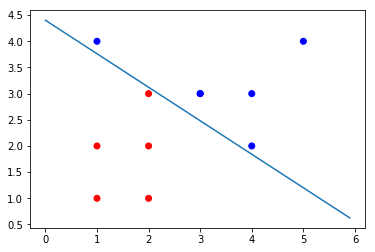

In [5]:
percepton.fitting()
w,b = percepton.getfunc()
print("w",w,"\n b",b)
x = np.arange(0, 6, 0.1)
y = -(w[0][0] * x + b[0])/w[1][0]

plt.plot(x,y)
plt.scatter(datas[:,0],datas[:,1],c=colors[datas[:,2]+1])
plt.show()

可以看到，数据的迭代顺序不同，会导致不同的解

## step 2 感知机的对偶形式

感知机模型 

$f(x) = sign((\sum{\alpha_jy_jx_j)\cdot x+b})$

梯度下降：

$\alpha_i \leftarrow \alpha_i +\eta$

$b \leftarrow b + \eta y_i$ 





In [6]:
class NewPerceptron:
    def __init__(self,dataset,lr=1,shuffle = False):
        self.dataset = dataset
        self.learningrate = lr
        self.alpha = np.zeros([len(self.dataset)], dtype=np.float32)
        self.b = 0
        self.gram = np.matmul(self.dataset[:,0:-1],self.dataset[:,0:-1].T)
        self.shuffle = shuffle
        

    def sign(self,xx):
        x = self.dataset[:,0:-1]
        w = self.alpha * self.dataset[:,-1]
        w = np.dot(w,x)
        return np.dot(xx,w)+self.b
    
    def fitting(self):
        for i in range(1000):
            flag = 0
            for index,data in enumerate(self.dataset):
                x = data[0:-1]
                y = data[-1]
                if y * self.sign(x) <= 0:
                    self.alpha[index] = self.alpha[index]+self.learningrate
                    self.b = self.b + y * self.learningrate
                    flag = 1
                    break
            if flag == 0:
                print("通过迭代{0}次后，完成分割".format(i+1))
                break
            else:
                if self.shuffle:
                    np.random.shuffle(self.dataset)

    
    def getfunc(self):
        x = self.dataset[:,0:-1]
        w = self.alpha * self.dataset[:,-1]
        w = np.dot(w,x)
        return w,self.b



通过迭代451次后，完成分割
w [ 7. 10.] 
 b -46


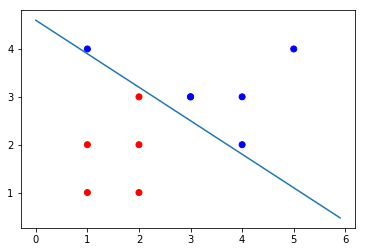

In [8]:
percepton = NewPerceptron(datas)
percepton.fitting()
w,b = percepton.getfunc()
print("w",w,"\n b",b)
x = np.arange(0, 6, 0.1)
y = -(w[0] * x + b)/w[1]

plt.plot(x,y)
plt.scatter(datas[:,0],datas[:,1],c=colors[datas[:,2]+1])
plt.show()


## step 3 实践一下
鸢尾花数据集

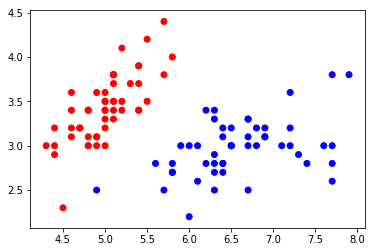

In [11]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#读取数据
df_data = pd.read_csv("./chapter two/iris.csv",header=0)
#设置
df_data["label"] = 1
df_data.loc[df_data.Species == 'setosa',"label"] = -1
df_data.loc[df_data.Species == 'versicolor',"label"] = 0
#为了能在二维空间表示，我们只选了label==0 和label == 2的数据
df_data = df_data[df_data.label.isin({1,-1})]

plt.figure()
plt.scatter(df_data['Sepal.Length'],df_data['Sepal.Width'],c=colors[df_data['label']+1])
plt.show()

通过迭代590次后，完成分割
w [[ 5.12518093]
 [-7.60089434]] 
 b [[-5.9]]


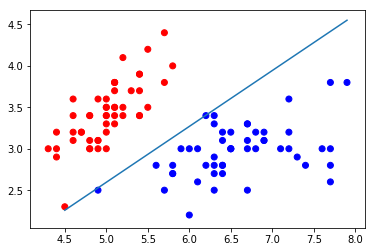

In [14]:
dataset = np.array(df_data.loc[:,['Sepal.Length','Sepal.Width','label']].values.tolist())
label = np.array(df_data.loc[:,'label'].values.tolist(),np.int)
percepton = OriginalPerceptron(dataset,lr=0.1,shuffle=False)
percepton.fitting()
w,b = percepton.getfunc()
print("w",w,"\n b",b)
x = np.arange(4.5, 8, 0.1)
y = -(w[0][0] * x + b[0])/w[1][0]

plt.plot(x,y)

plt.scatter(df_data['Sepal.Length'],df_data['Sepal.Width'],c=colors[df_data['label']+1])
plt.show()

通过迭代619次后，完成分割
w [ 5.20016891 -7.69990609] 
 b -5.999999999999995


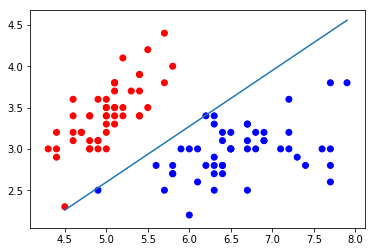

In [15]:
dataset = np.array(df_data.loc[:,['Sepal.Length','Sepal.Width','label']].values.tolist())
label = np.array(df_data.loc[:,'label'].values.tolist(),np.int)
percepton = NewPerceptron(dataset,lr=0.1,shuffle=False)
percepton.fitting()
w,b = percepton.getfunc()
print("w",w,"\n b",b)
x = np.arange(4.5, 8, 0.1)
y = -(w[0] * x + b)/w[1]

plt.plot(x,y)

plt.scatter(df_data['Sepal.Length'],df_data['Sepal.Width'],c=colors[df_data['label']+1])
plt.show()